**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, balanced_accuracy_score

**Import Files**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


**Reading the Dataset**

In [3]:
df = pd.read_csv('Iris.csv')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Data Cleaning andData Summarization**

In [4]:
df.isna().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Checking corr relationship in the dataset
corr_relation = df.corr(numeric_only=True)
corr_relation

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


**Data Visualization**

<Axes: >

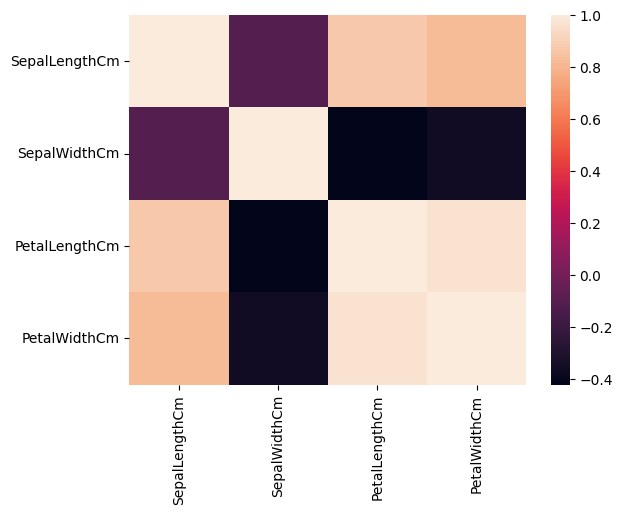

In [8]:
sns.heatmap (corr_relation)

<Axes: >

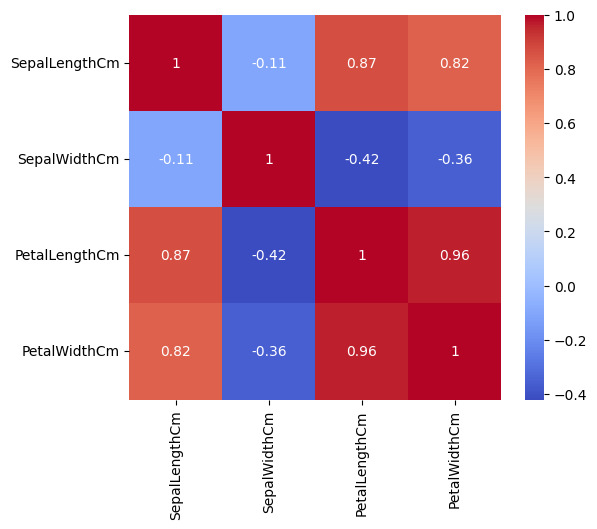

In [9]:
# Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr_relation,cmap='coolwarm',annot=True)

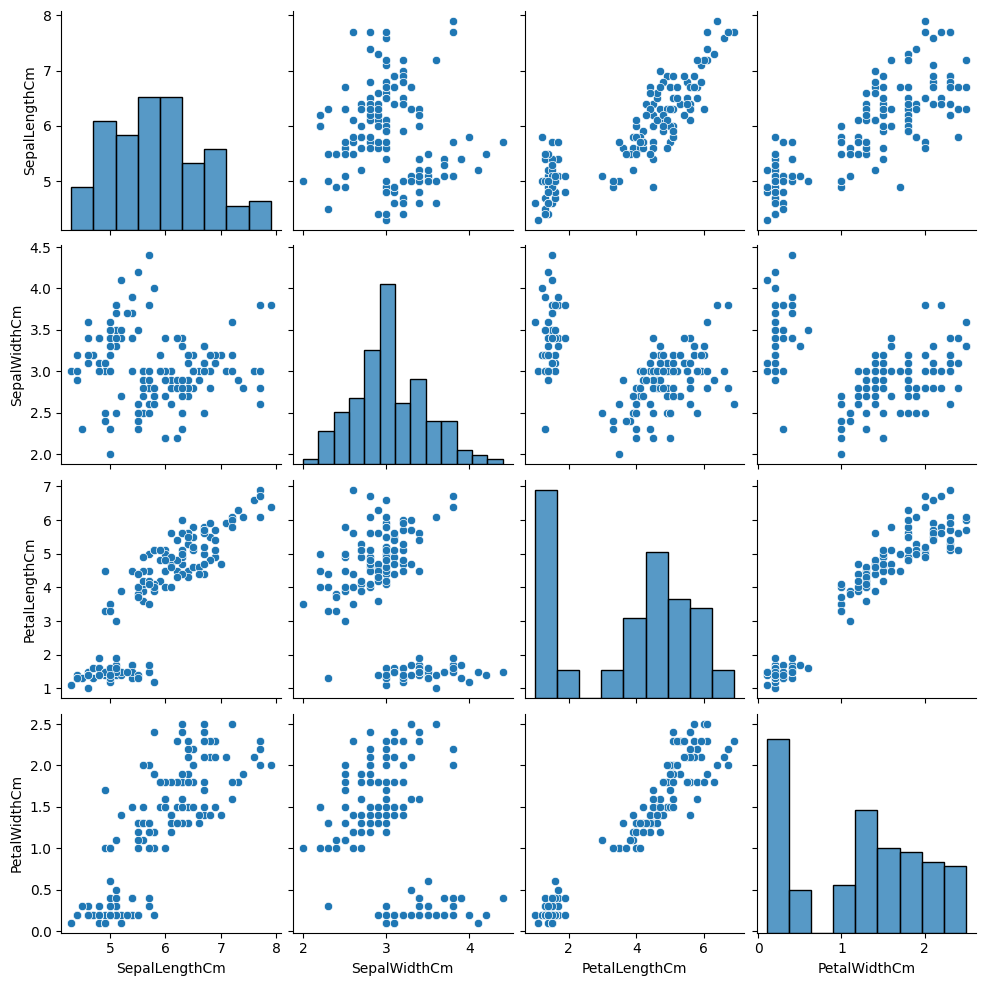

In [10]:
sns.pairplot(df)

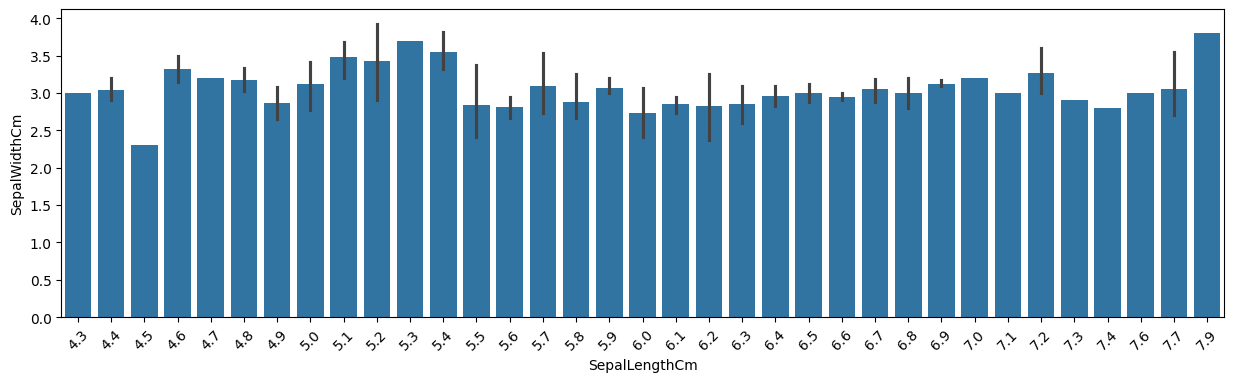

In [11]:
plt.figure(figsize=(15,4))
sns.barplot(data=df,x='SepalLengthCm',y='SepalWidthCm')
plt.xticks(rotation=45)
plt.show()

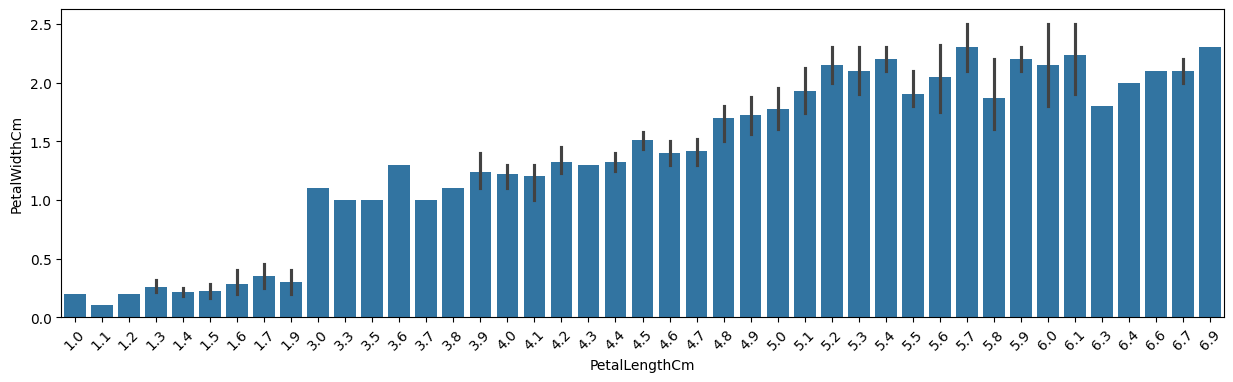

In [12]:
plt.figure(figsize=(15,4))
sns.barplot(data=df,x='PetalLengthCm',y='PetalWidthCm')
plt.xticks(rotation=45)
plt.show()

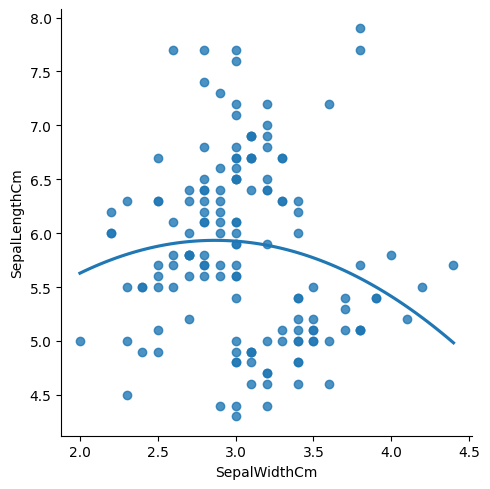

In [13]:
# Plotting the Scatter plot to check relationship between SepalWidthCm and SepalLengthCm
sns.lmplot(x ="SepalWidthCm", y ="SepalLengthCm", data = df, order = 2, ci = None)
plt.show()

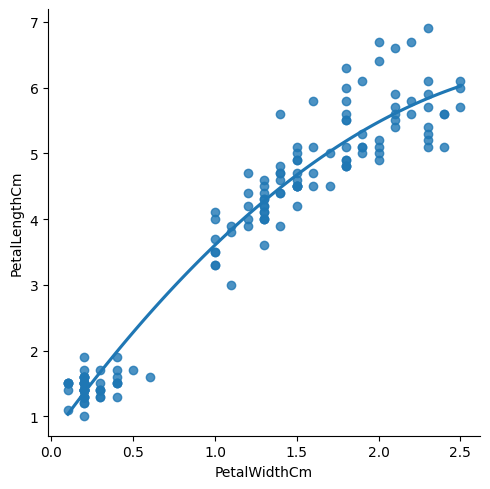

In [14]:
# Plotting the Scatter plot to check relationship between Petal Width and Petal Length
sns.lmplot(x ="PetalWidthCm", y ="PetalLengthCm", data = df, order = 2, ci = None)
plt.show()

**Splitting the Data into Training and Testing**

In [15]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ["Species"]).values
Y = df["Species"].values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 1)

print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


Accuracy:  0.9736842105263158


[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



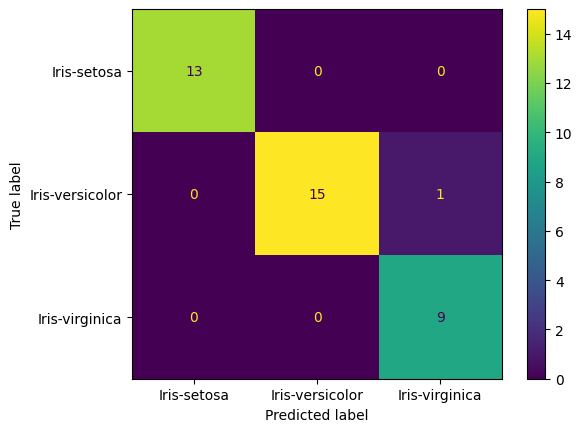

In [16]:
# Logistic Regression

lris = LogisticRegression(solver='lbfgs', max_iter=100)
lris.fit(X_train, Y_train)

Y_pred = lris.predict(X_test)
Y_pred

accuracy_lgr = accuracy_score(Y_test,Y_pred)
print("Accuracy: ",accuracy_lgr)

print('\n')
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

In [17]:
# K-Nearest Neighbour

classifier = KNeighborsClassifier(n_neighbors = 4)
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
print(classifier.score(X_test, Y_test))

1.0


Accuracy:  1.0


[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



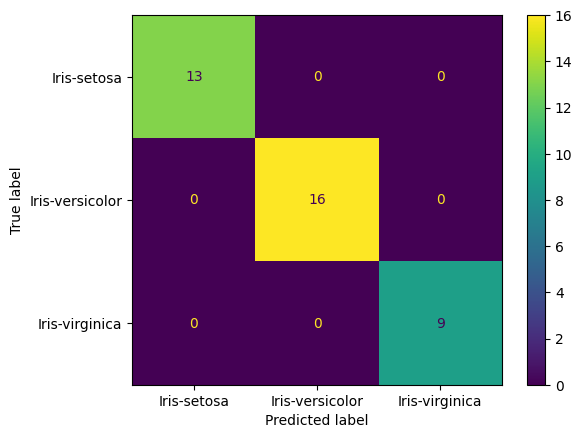

In [18]:
accuracy_knn = accuracy_score(Y_test,Y_pred)
print("Accuracy: ",accuracy_knn)
print('\n')
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

In [19]:
# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=10).fit(X_train,Y_train)
Y_pred_tree = decision_tree.predict(X_test)

Accuracy:  0.9736842105263158


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



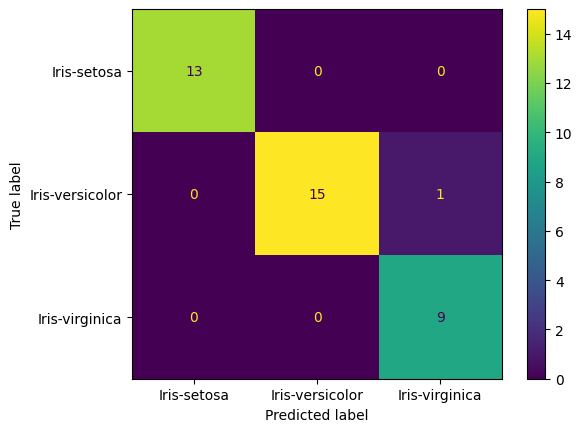

In [20]:
accuracy_dt = accuracy_score(Y_test,Y_pred_tree)
print("Accuracy: ",accuracy_dt)
print('\n')
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred_tree))
print(classification_report(Y_test,Y_pred_tree))

In [21]:
# Random Forest Classifier

rfc = RandomForestClassifier(n_estimators=50,criterion='entropy')
rfc.fit(X_train,Y_train)
predictions = rfc.predict(X_train)

Accuracy:  1.0


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



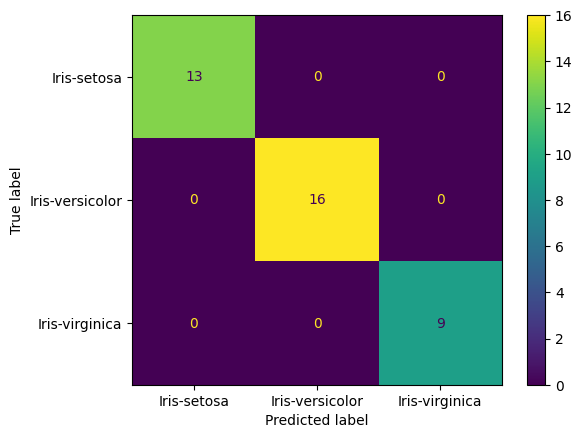

In [22]:
accuracy_rfc = accuracy_score(Y_test,Y_pred)
print("Accuracy: ",accuracy_rfc)
print('\n')
print(classification_report(Y_test,Y_pred))
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred))


In [25]:
# Support Vector Machine (SVM)

svml = SVC()
svml.fit(X_train,Y_train)
Y_pred = svml.predict(X_test)

Accuracy:  0.9736842105263158




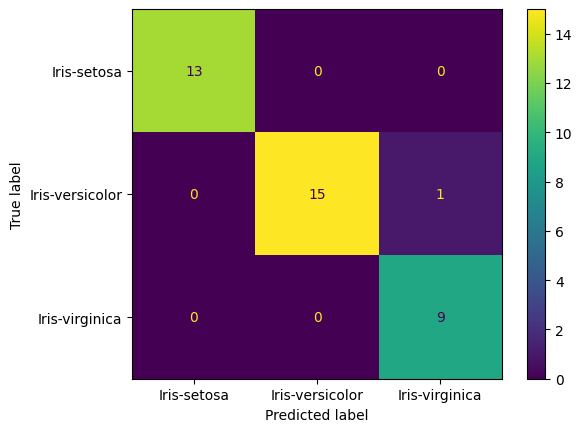

In [26]:
accuracy_svml = accuracy_score(Y_test,Y_pred)
print("Accuracy: ",accuracy_svml)
print('\n')
print(ConfusionMatrixDisplay.from_predictions(Y_test,Y_pred))

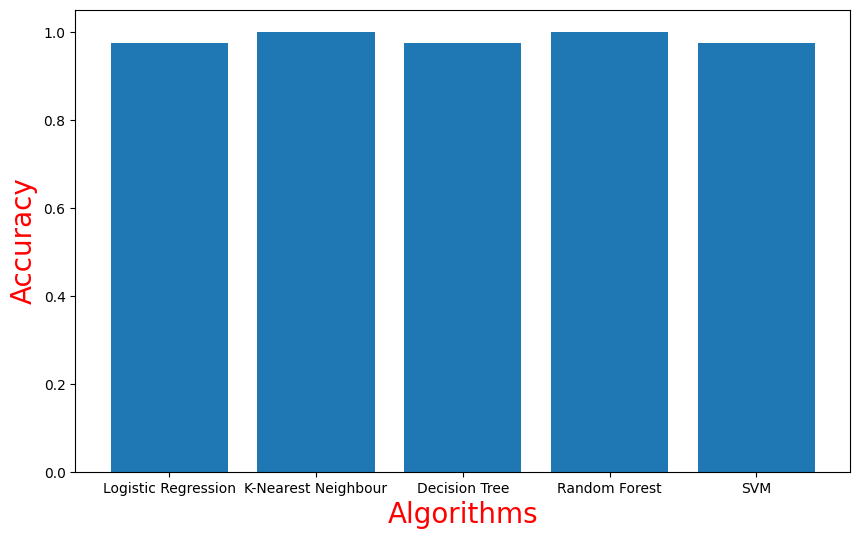

In [27]:
# Comparison of Performance

plt.figure(figsize=(10, 6))
plt.bar(['Logistic Regression','K-Nearest Neighbour','Decision Tree','Random Forest','SVM'],
        [accuracy_lgr,accuracy_knn,accuracy_dt,accuracy_rfc,accuracy_svml])
plt.xlabel("Algorithms", color = 'red', fontsize=20)
plt.ylabel("Accuracy", color='red', fontsize=20)
plt.show()

**Result :**
K-Nearest Neighbour's accuracy result is higher than other classifications.
